In [1]:
import pandas as pd
ans = pd.read_csv("others/human/answer.csv")
que = pd.read_json("others/human/question.json")

In [7]:
ans["填答秒數"].describe()

count      40.000000
mean      723.550000
std       655.592664
min       206.000000
25%       371.000000
50%       540.500000
75%       733.500000
max      3997.000000
Name: 填答秒數, dtype: float64

In [207]:
allorder = []
sumOrder = None
for i, row in que.iterrows():
    typeList = ["Next", "RD_Frame", "FIX_Frame", "SUB_Only", "Random"]
    tbs = []
    for typ in typeList:
        tb = {}
        for order in range(1,6):
            tb[order] = (ans[row["Pre"]+" - 排序{}".format(order)] == row[typ]).mean()
        tbs.append(tb)
    tbs = pd.DataFrame(tbs, index=["原始", "隨機畫面", "固定畫面", "純文字", "隨機選擇"])
    if sumOrder is None:
        sumOrder = tbs.copy()
    else:
        sumOrder += tbs.values
    allorder.append({
        "question": row["Pre"],
        "frame": tbs
    })
sumOrder = sumOrder / len(que)

In [200]:
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(dataFrame, title=None, cmap = plt.cm.binary):  
    plt.imshow(dataFrame, interpolation='nearest', cmap=cmap)  
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.array(range(len(sumOrder.columns))), sumOrder.columns)  
    plt.yticks(np.array(range(len(sumOrder.index))), sumOrder.index) 
#     plt.ylabel('模型種類')
    plt.xlabel('排序')  

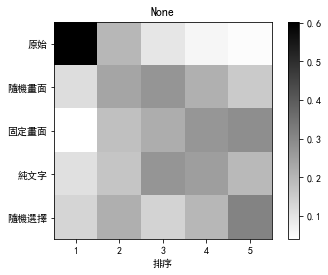

In [201]:
plot_confusion_matrix(sumOrder)
plt.show()

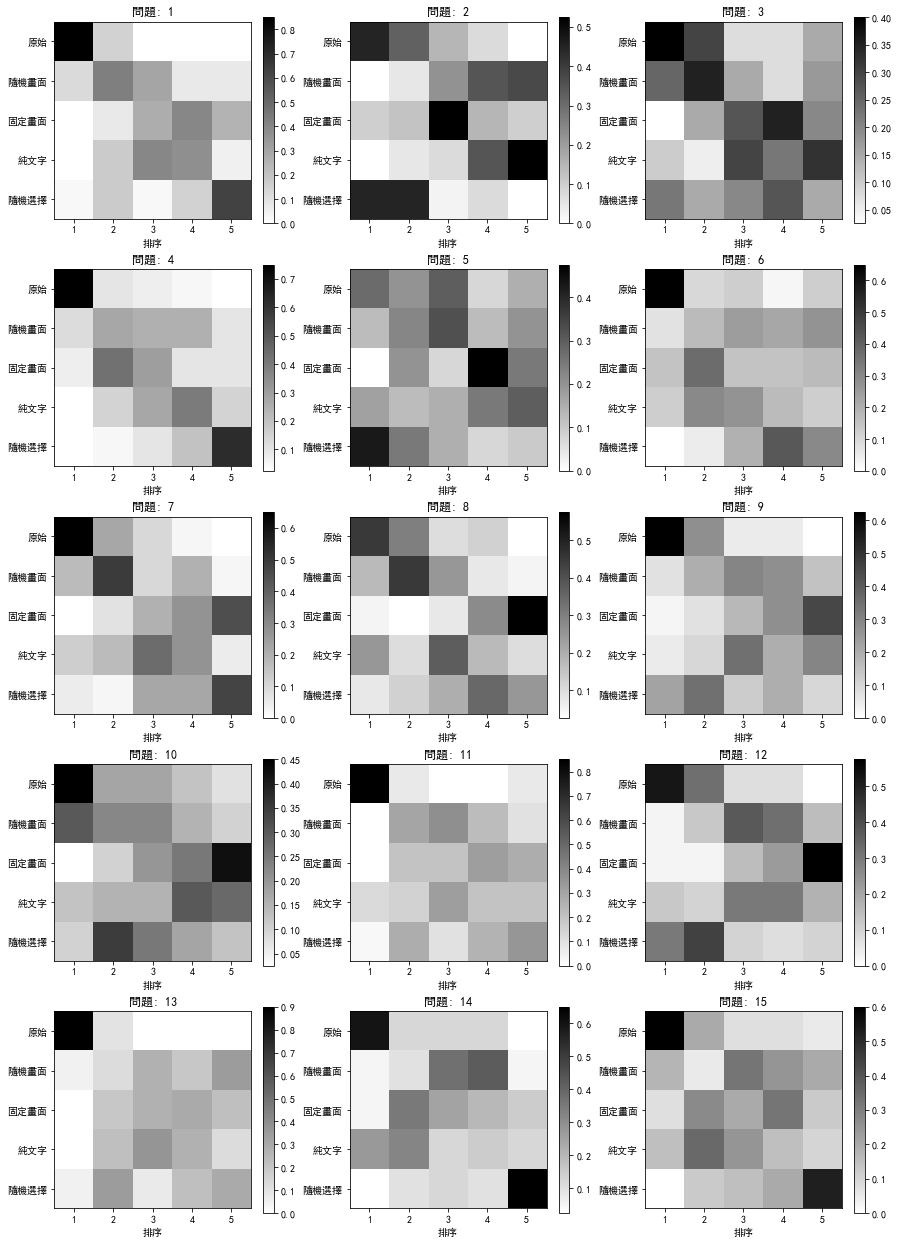

In [208]:
plt.figure(figsize=(15,22))
for i, data in enumerate(allorder):
    plt.subplot(5,3,i+1)
    plot_confusion_matrix(data["frame"], "問題: {}".format(i + 1))
plt.show()

In [206]:
sumOrder["sum"] = [0.00]*len(sumOrder)
sumOrder["mrr"] = [0.00]*len(sumOrder)
sumOrder["add"] = [0.00]*len(sumOrder)
for i, row in sumOrder.iterrows():
    for i in range(1,6):
        row["mrr"] += row[i] / i
        row["add"] += row[i] * (6-i)
        row["sum"] += row[i]
sumOrder.round(2)

,1,2,3,4,5,sum,mrr,add
原始,0.60,0.20,0.09,0.06,0.05,1.0,0.76,4.25
隨機畫面,0.12,0.24,0.27,0.22,0.16,1.0,0.41,2.94
固定畫面,0.04,0.18,0.22,0.27,0.29,1.0,0.33,2.41
純文字,0.11,0.17,0.27,0.25,0.20,1.0,0.39,2.74
隨機選擇,0.13,0.22,0.14,0.20,0.31,1.0,0.40,2.66


In [3]:
que.iloc[0]

FIX_Frame     人們都沒出來美國 真是一千美元
Img                    00.bmp
Next                       天吶
Pre               夠我開一家平價服飾店了
RD_Frame              100塊錢還多
Random             搶劫 盜竊 持刀搶盜
SUB_Only     等等 不許再嘲笑我三年前買了一半
Name: 0, dtype: object